In [5]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed
import pandas as pd
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

plt.rcParams["figure.figsize"] = [12, 9]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


## Announcements

  - Midterm 1 is in the books
    - ![Histogram of Exam 1](e1hist.png)
    - Individual "audits" available.
    - Midterm 2 - Thur 11/7.
  - Quiz 5 this week. 
    - Directional derivatives
    - 3 properties of $\nabla f$
  - Homework 7 due Tuesday
    

# One-minute Review

  - Local mins and maxes occur at critical points (usually where $\nabla f = \vec 0$).
  - Critical points with no local extrema are saddle points
  - 2nd Derivative Test: $$D = \begin{vmatrix} f_{xx} & f_{xy} \\ f_{xy} & f_{yy} \end{vmatrix}_{(a,b)}$$

Then, 
  - if $D>0$ and $f_{xx} < 0$, $f(a,b)$ is a local maximum.
  - if $D>0$ and $f_{xx} > 0$, $f(a,b)$ is a local minimum.
  - if $D<0$, $(a,b)$ is a saddle point. 

Otherwise, the test is inconclusive.

# Lecture 13

  - Objectives
    - Identify open and closed sets
    - Solve unconstrained optimization problems
    - Solve constrained optimization problems (Lagrange Multipliers)
    
    
  - Resources
    - Content
      - Stewart: §14.8
      - New Strang: [§4.8](https://openstax.org/books/calculus-volume-3/pages/4-8-lagrange-multipliers)
      - [Slides](https://hub.columbiajupyter2.org/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fdrewyoungren%2Fmvc-f19&urlpath=tree%2Fmvc-f19%2Fslides%2Fmvc-L13.ipynb) via JupyterHub
    - Practice
      - Mooculus: {Constrained Optimization](https://ximera.osu.edu/mooculus/calculus3/constrainedOptimization/digInConstrainedOptimization) [Lagrange Multipliers](https://ximera.osu.edu/mooculus/calculus3/lagrangeMultipliers/digInLagrangeMultipliers)
    - Extras
      - CalcBLUE: [Optimization](https://www.youtube.com/watch?v=CBWMHf1MfEs&list=PL8erL0pXF3JZZTnqjginERYYEi1WpLE_V&index=110) 

# A (very) little topology

Without looking at definitions, identify a "boundary point" and an "interior point" of the set $S$ (in white) below.

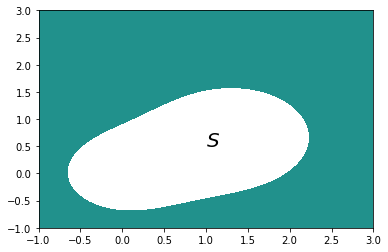

In [15]:
f = lambda x,y: exp(-x**2-y**2) + 3/2*exp(-(x-4/3)**2-(y-2/3)**2)

X=Y = np.linspace(-1,3,100)
X,Y = np.meshgrid(X,Y)
plt.contourf(X,Y,f(X,Y),levels=[0,2/3])
plt.text(1,1/2,"$S$",fontsize=20);
                                          
                            

Let $S$ be a set in $\RR^n$ and $\vec p$ be the position of a point in it.  (We can be lazy and say $\vec p \in S$.)

$\vec p$ is an **interior point** of $S$ if there exists a positive radius $r>0$ such that for all $|\vec y - \vec p| < r$, $\vec y \in S$.

$\vec p$ is a **boundary point** of $S$ if for every $r>0$, there are points $\vec y_1$ and $\vec y_2$ with $|\vec y_i - \vec p| < r$ such that $\vec y_1 \in S$ and $\vec y_2 \notin S$.

#### Quick Example

Let $S\subset \RR^2$ be the unit disk. $(1,0)$ is a boundary point. $(1/2,1/2)$ is an interior point.

## Definitions 

A set $S$ is **open** if all points are interior points.

A set $S$ is **closed** if it contains all its boundary points.

# Optimization


### Theorem (Fermat, I guess)

If a local maximum or minimum of a function $f:D\to \RR$ occurs at an interior point $\vec p$, then $\vec p$ is a critical point of $f$. 

### Interpretation

On an open domain, look only at critical points for maxima and minima.

## First Example - Unconstrained optimization.

  Find the point on the plane $z = x -2y + 3$ closest to the origin.
  

In [7]:
@interact
def _(angle=(-120,30,6)):
    fig= plt.figure(figsize=(8,8),dpi=100)
    ax = fig.add_subplot(111,projection='3d')
    x = y = np.linspace(-3/2,3/2,100)
    x,y = np.meshgrid(x,y)
    ax.view_init(30,angle)
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    ax.plot_surface(x,y,x - 2*y + 3,alpha=.5,cmap="ocean")
    ax.set_zlim3d([0,4])
    ax.plot([0,-1/2],[0,1],[0,1/2])
    ax.plot([0,0],[0,0],[0,4],'k')
    ax.plot([0,0],[-2,2],[0,0],'k')
    ax.plot([-2,2],[0,0],[0,0],'k');

interactive(children=(IntSlider(value=-48, description='angle', max=30, min=-120, step=6), Output()), _dom_cla…

### Extreme Value Theorem

If $D\in \RR^n$ is closed and bounded and $f:D\to \RR$ is continuous, then there is an $\vec x \in D$ such that $f(\vec x)$ is the **global maximum**. That is, $f(\vec y) \leq f(\vec x)$.  

The same holds for the global minimum, mutatis mutandis. 

## Consequences

When trying to find the absolute extrema of a function $f$ on a set $D$, 
  - Find all critical points of $f$ in $D$ (unconstrained optimization). 
  - Find the extremes on the boundary of $D$.

In [6]:
f = lambda x,y: 20*exp(-(x**2 + y**2)) - 15* exp(-2 *((x - 1)**2 + (y - 3/4)**2)) - 18 *exp(-2 *((x - 1)**2 + (y + 1/2)**2))
g = lambda x,y: 10*x**2
h = lambda x,y: 20*((x - 1)**2 - y**2/2) 
k = lambda x,y: 20*exp(-1/2*((x - 1/4)**2 + (y + 1/3)**2))*sin(5*x)*cos(7*y)

@interact
def _(func={"f": f,"g":g,"h":h,"k":k},angle=(-170,0,6),vangle=(0,90,6),grad=False,surf=False,):
    fig = plt.figure(figsize = (10,10),dpi=100)
    ax = fig.add_subplot(111,projection='3d')
    ax.view_init(vangle,angle)
    for c in 'xy':
        getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    x =  np.linspace(-1,1,101)
    y =  np.linspace(0,1,101)    
    X,Y = np.meshgrid(x,y*3/2*(1-x**2))
    Z = func(X,Y)
    if surf:
        ax.plot_surface(X,Y,Z,alpha=.9,cmap='ocean',rcount=70,ccount=70);
#     ax.quiver([1,1],[0,0],[0,0],[-2/exp(1),-1/sqrt(2)],[1/exp(1),1/sqrt(2)],[0,0],lw=3,color='r',alpha=1)
#     xx =yy = np.linspace(-3/2,3/2,20)
#     xx,yy = np.meshgrid(xx,yy)
#     if grad: 
#         ax2.quiver(xx,yy,func(xx+.01,yy)-func(xx,yy),func(xx,yy+.01)-func(xx,yy),lw=3,alpha=1)


interactive(children=(Dropdown(description='func', options={'f': <function <lambda> at 0x7fbc1e226f28>, 'g': <…